Imports and libs

In [1]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311926 sha256=028ceb24de50823a14c7a485f948541260dcbb22b0f7aa792bf192eb6a07ea0f
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [124]:
import hdbscan
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
from sklearn.cluster import DBSCAN
import time
import seaborn as sns
import sklearn.cluster as cluster
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.50, 's' : 50, 'linewidths':0}

In [26]:
def get_points_between_two_coordinates(line):
    x1,y1,x2,y2 = line    
    rise = y1-y2
    run = x1-x2
    slope = rise/run
    # print(slope)

    dots_line = []
    from_point = (x1,y1)
    sign = 1
    points = ([x1+sign*i,math.floor(y1+(sign*i*slope))] for i in range(1+int(math.ceil(abs(x1-x2)))))
    for pt in points:
        dots_line.append(pt)
    return np.array(dots_line)

def plot_clusters_on_image(data, algorithm,image_name, args, kwds):

    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()

    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    number_of_cluster = len([palette[x] for x in labels if x > 0])

    plt.figure(figsize=(12, 10), dpi=80)
    im = plt.imread(image_name)
    implot = plt.imshow(im)
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    plt.text(-0.5, 0.7, f'Cluster number {number_of_cluster} ', fontsize=12)


def get_lines_xy(houghLines):
    lines = []
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            lines.append([(x1,y1),(x2,y2)])
    return lines


def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)


def draw_lines_P(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)




def middle_of_line(x1,y1,x2,y2):
    midpoint = (int((x1+x2)/2),int((y1+y2)/2))
    return midpoint

def dist_between_two_points(x1,y1,x2,y2):
    return ((((x2 - x1 )**2) + ((y2-y1)**2) )**0.5)
    
def make_lines_same_legth(line1,line2):
    x1, y1, x2, y2 = line1
    x_1,y_1,x_2,y_2 = line2
    if x1 < x_1:
        x_1 = x1
    else:
        x1 = x_1
    
    if x2 > x_2:
        x_2 = x2
    else:
        x2 = x_2

    return (x1, y1, x2, y2),(x_1,y_1,x_2,y_2)



def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)


def drawline(line_1, line_2):    
    line1, line2 = make_lines_same_legth(line_1,line_2)
    x1,y1,x2,y2 = line1
    x_1,y_1,x_2,y_2 = line2
    path = '/content/house2.jpg'
    image = cv2.imread(path)
    color = (0, 0, 255)
    thickness = 5
    midpoint1 = middle_of_line(x1,y1,x2,y2)
    midpoint2 = middle_of_line(x_1,y_1,x_2,y_2)
    dist = dist_between_two_points(*midpoint1,*midpoint2)
    print(dist)
    cv2.line(image, (x1,y1), (x2,y2), color, thickness)
    cv2.line(image, (x_1,y_1), (x_2,y_2), color, thickness)
    # cv2_imshow(image) 
    plt.figure(figsize = (30,20))
    # plt.subplot(131)
    plt.imshow(image)


def find_lines_with_defined_distance(filtered_lines,DISTANCE_BETWEEN_FLOORS:int = 70)-> list:
    lines_with_good_dist = []
    for i in linesFiltered:
        for j in linesFiltered:
            line1, line2 = make_lines_same_legth(i[0],j[0])
            x1,y1,x2,y2 = line1
            x_1,y_1,x_2,y_2 = line2
            midpoint1 = middle_of_line(x1,y1,x2,y2)
            midpoint2 = middle_of_line(x_1,y_1,x_2,y_2)
            dist = dist_between_two_points(*midpoint1,*midpoint2)
            if dist > (DIST_FLOORS - 5) and dist < (DIST_FLOORS + 5):
                lines_with_good_dist.append([*line1,*line2])
    return lines_with_good_dist

In [100]:
def grayscale(img):    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold=50, high_threshold=120):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size=(9, 9)):
    return cv2.GaussianBlur(img, kernel_size, 0)


def image_preproccesing(image_path,canny_params = [50,120], gaussian_kernel_size = (9,9)):
    """
    canny_params = [low_threshold,high_threshold]
    """
    image = cv2.imread(image_path)
    # image preproccesing
    gray_image = grayscale(image)
    blurred_image = gaussian_blur(gray_image, gaussian_kernel_size)
    edges_image = canny(blurred_image, *canny_params)
    return edges_image

def get_lines_from_image_with_houghlines(image,rho=1,theta=np.pi/180,threshold=150,min_line_length=600,max_line_gap=100):
    houghLines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
    return houghLines


def filter_hough_lines(houghLines):
    """
    func to get horizontal lines
    """
    linesFiltered = []
    for line in houghLines:
        for x1,y1,x2,y2 in line:		
            a = float((y2-y1)/(x2-x1))  #slope

            if not np.isnan(a) or np.isinf(a) or (a == 0):
                if abs(a) < 0.1:
                    linesFiltered.append(line)
    print(f'number of hough lines: {len(houghLines)}')
    print(f'number of filtered hough lines: {len(linesFiltered)}')
    return linesFiltered


def plot_filtered_lines_on_image(linesFiltered, image_path:str, plot_orig_image=False)->None:
    image = cv2.imread(image_path)
    preprocced_image = image_preproccesing(image_path)
    imgHeight = image.shape[0]
    imgWidth = image.shape[1]
    houghLinesImage = np.zeros((imgHeight, imgWidth, 3), dtype=np.uint8)    

    draw_lines_P(houghLinesImage, linesFiltered)
    origWithHoughLines = weighted_img(houghLinesImage,image)


    # plot images
    plt.figure(figsize = (30,20))
    if plot_orig_image:
        plt.subplot(131)
        plt.imshow(image)
        plt.subplot(132)
        plt.imshow(preprocced_image)
        plt.subplot(133)
        plt.imshow(origWithHoughLines)
    else:
        plt.imshow(origWithHoughLines)


def get_lines_for_plot(filtered_hough_lines):
    ROWS, COLM = np.array(filtered_hough_lines).reshape(len(filtered_hough_lines),4).shape
    lines = []
    for line in np.array(filtered_hough_lines).reshape(ROWS,COLM): 
        lines.append(get_points_between_two_coordinates(line))
                
    lines_for_plot = np.vstack(np.array(lines))
    return lines_for_plot


In [116]:
path = '/content/house2.jpg'
image = image_preproccesing(path)
houghLines = get_lines_from_image_with_houghlines(image ,rho=1,theta=np.pi/180,threshold=170,min_line_length=600,max_line_gap=100)
if houghLines is None:
    print(f'No lines detected, houghLines is {houghLines}')
else:
    filtered_hough_lines = filter_hough_lines(houghLines)
    # plot_filtered_lines_on_image(filtered_hough_lines, image_path = path, plot_orig_image=False)
    lines_for_plot = get_lines_for_plot(filtered_hough_lines)

number of hough lines: 33
number of filtered hough lines: 19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


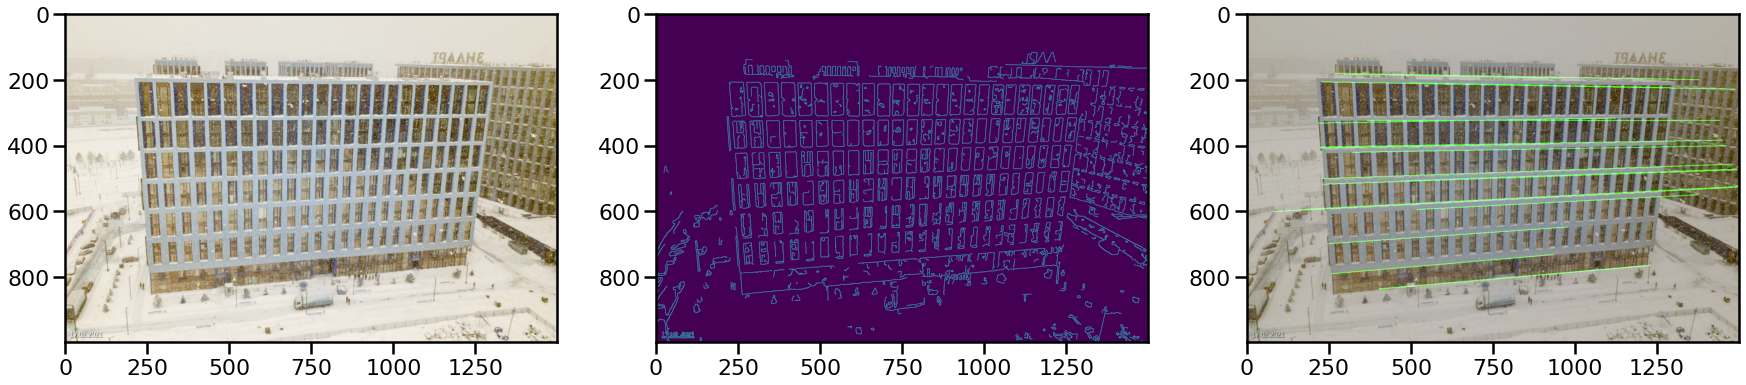

In [117]:
plot_filtered_lines_on_image(filtered_hough_lines, image_path=path, plot_orig_image=True)

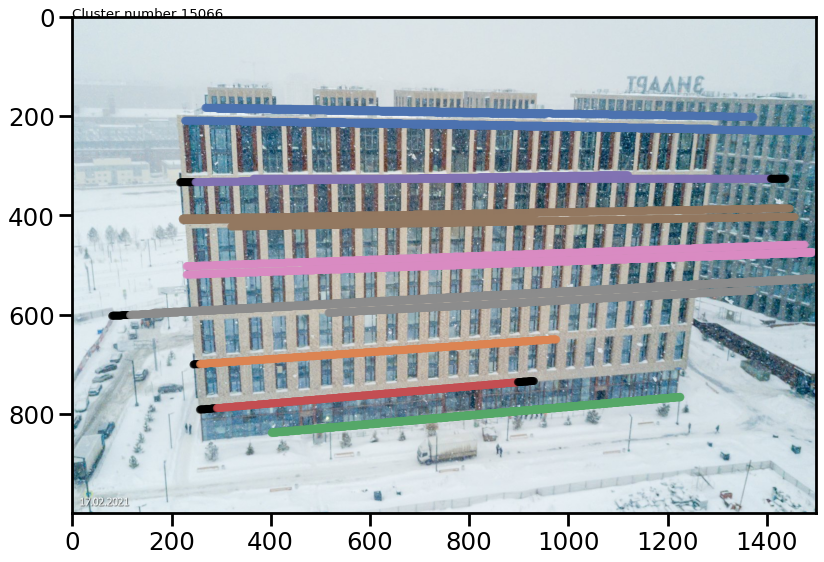

In [125]:
plot_clusters_on_image(lines_for_plot, hdbscan.HDBSCAN, path ,(), {'min_cluster_size':90})